In [3]:
!ls -Rl

.:
total 7216
-rwxrwxrwx 1 angelrps angelrps 7369019 Apr  7 19:34 Data_Analysis.ipynb
-rw-rw-rw- 1 angelrps angelrps    1392 Jun 11 11:52 Data_Analysis_Weather.ipynb
-rw-rw-rw- 1 angelrps angelrps   10144 Apr  8 17:19 HowToTackleDataScienceChallenge.ipynb


In [5]:
# count lines
!wc -l ../z_resources/data_test/dataexport_20200610T114457.csv
# the file has 26289 lines

26289 ../z_resources/data_test/dataexport_20200610T114457.csv


In [6]:
!head -5 ../z_resources/data_test/dataexport_20200610T114457.csv

location,Basel,Basel,Basel,Basel,Basel,Basel
lat,47.54694,47.54694,47.54694,47.54694,47.54694,47.54694
lon,7.56892,7.56892,7.56892,7.56892,7.56892,7.56892
asl,283.697,283.697,283.697,283.697,283.697,283.697
variable,Temperature,Precipitation Total,Snowfall Amount,Cloud Cover Total,Wind Speed,Wind Direction


# 2. Study the Data

In [106]:
import pandas as pd
import random
import matplotlib.pyplot as plt
plt.style.use("seaborn")                  # Establecemos el estilo gráfico de seaborn por defecto
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [62]:
# 1. Overall inspection
dfw = pd.read_csv('../z_resources/data_test/dataexport_20200610T114457.csv',
                  sep=',')
dfw.head(15)

,location,Basel,Basel.1,Basel.2,Basel.3,Basel.4,Basel.5
0,lat,47.54694,47.54694,47.54694,47.54694,47.54694,47.54694
1,lon,7.56892,7.56892,7.56892,7.56892,7.56892,7.56892
2,asl,283.697,283.697,283.697,283.697,283.697,283.697
3,variable,Temperature,Precipitation Total,Snowfall Amount,Cloud Cover Total,Wind Speed,Wind Direction
4,unit,°C,mm,cm,%,km/h,°
5,level,2 m elevation corrected,sfc,sfc,sfc,10 m,10 m
6,resolution,hourly,hourly,hourly,hourly,hourly,hourly
7,aggregation,None,None,None,None,None,None
8,timestamp,Basel Temperature [2 m elevation corrected],Basel Precipitation Total,Basel Snowfall Amount,Basel Cloud Cover Total,Basel Wind Speed [10 m],Basel Wind Direction [10 m]
9,20170101T0000,3.3205285,0.0,0.0,0.0,3.4115846,128.6598


In [75]:
# I SUMMARIZE ALL STEPS IN EACH CELL TO AVOID CONFLICTS OF UNTRACKED DF CHANGES

# 1. Overall inspection
dfw = pd.read_csv('../z_resources/data_test/dataexport_20200610T114457.csv',
                  sep=',')
# 2. From the first 9 rows I just need the eighth.
# convert the eighth column into headed and reset indexes.
dfw.columns = dfw.iloc[8]
dfw = dfw.drop([0,1,2,3,4,5,6,7,8]).reset_index(drop =True)
dfw.info(15)

8,timestamp,Basel Temperature [2 m elevation corrected],Basel Precipitation Total,Basel Snowfall Amount,Basel Cloud Cover Total,Basel Wind Speed [10 m],Basel Wind Direction [10 m]
0,20170101T0000,3.3205285,0.0,0.0,0.0,3.4115846,128.6598
1,20170101T0100,3.3905284,0.0,0.0,0.0,4.3692846,127.56859
2,20170101T0200,3.3805285,0.0,0.0,0.0,4.4337797,122.73523
3,20170101T0300,3.3905284,0.0,0.0,0.0,4.743117,128.15723
4,20170101T0400,3.4505286,0.0,0.0,0.0,4.1698194,116.56505
5,20170101T0500,2.9805286,0.0,0.0,0.0,4.802594,109.44003
6,20170101T0600,2.4905286,0.0,0.0,0.0,5.0052013,115.20112
7,20170101T0700,2.2505286,0.0,0.0,0.0,5.8182635,105.9454
8,20170101T0800,1.8905287,0.0,0.0,0.0,6.1503215,107.650116
9,20170101T0900,1.6505287,0.0,0.0,0.0,6.552573,116.56505


In [93]:
# I SUMMARIZE ALL STEPS IN EACH CELL TO AVOID CONFLICTS OF UNTRACKED DF CHANGES

# 1. Overall INSPECTION
dfw = pd.read_csv('../z_resources/data_test/dataexport_20200610T114457.csv',
                  sep=',')

# 2. From the first 9 rows I just need the eighth.
# convert the eighth column into HEADER and reset INDEXES.
dfw.columns = dfw.iloc[8]
dfw = dfw.drop([0,1,2,3,4,5,6,7,8]).reset_index(drop =True)

# 3. For the first model approach I will just keep the 'Precipitation' (and timestamp) column to see how the rain affect pick-ups
# I will also simplify the column name
dfw = dfw[['timestamp', 'Basel Precipitation Total']]
dfw.set_axis(['Timestamp', 'Precipitation'], axis=1, inplace = True)
dfw.sample(5)

,Timestamp,Precipitation
8457,20171219T0900,0.0
21259,20190605T1900,0.0
3246,20170516T0600,0.0
11511,20180425T1500,0.0
18519,20190211T1500,0.0


In [103]:
# I SUMMARIZE ALL STEPS IN EACH CELL TO AVOID CONFLICTS OF UNTRACKED DF CHANGES

# 1. Overall INSPECTION
dfw = pd.read_csv('../z_resources/data_test/dataexport_20200610T114457.csv',
                  sep=',')

# 2. From the first 9 rows I just need the eighth.
# convert the eighth column into HEADER and reset INDEXES.
dfw.columns = dfw.iloc[8]
dfw = dfw.drop([0,1,2,3,4,5,6,7,8]).reset_index(drop =True)

# 3. For the first model approach I will just keep the 'Precipitation' (and timestamp) column to see how the rain affect pick-ups
# I will also simplify the column name
dfw = dfw[['timestamp', 'Basel Precipitation Total']]
dfw.set_axis(['Timestamp', 'Precipitation'], axis=1, inplace = True)

# 4. Convert to right data type
dfw['Timestamp'] = pd.to_datetime(dfw['Timestamp'])
dfw['Precipitation'] = pd.to_numeric(dfw['Precipitation'])
dfw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26280 entries, 0 to 26279
Data columns (total 2 columns):
Timestamp        26280 non-null datetime64[ns]
Precipitation    26280 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 410.8 KB


In [104]:
# Set timestamp as index to visualize time series
dfw.set_index('Timestamp', inplace=True)
dfw.head()

,Precipitation
Timestamp,
2017-01-01 00:00:00,0.0
2017-01-01 01:00:00,0.0
2017-01-01 02:00:00,0.0
2017-01-01 03:00:00,0.0
2017-01-01 04:00:00,0.0


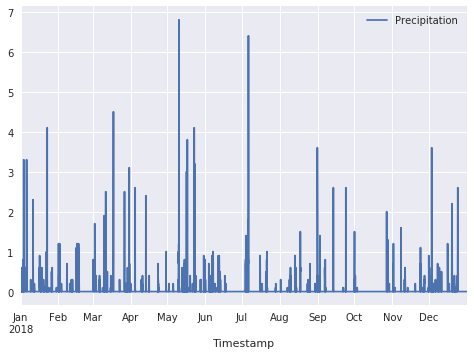

In [113]:
dfw['2018'].plot()
#dfw.plot()
#plt.show()